In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Load the datasets
data_features = pd.read_csv("../train_logs.csv")
data_scores = pd.read_csv("../train_scores.csv")

# Merge the features and scores on 'id'
data = pd.merge(data_features, data_scores, on='id', how='left')

In [3]:
import pandas as pd

def aggregate_data(df, agg_methods):
    # Perform the aggregation using the provided methods
    data_aggregated = df.groupby('id').agg(agg_methods).reset_index()

    # Flatten the MultiIndex columns and add the aggregation methods to the column names
    if isinstance(data_aggregated.columns, pd.MultiIndex):
        # Use a conditional expression to leave 'score' as is
        data_aggregated.columns = [f"{col[0]}_{col[1]}" if col[0] != 'score' else col[0] for col in data_aggregated.columns.values]

    return data_aggregated

# Define the aggregation methods outside of the function
aggregation_methods = {
    'down_time': ['sum'],
    'up_time': ['sum'],
    'action_time': ['sum'],
    'cursor_position': ['max'],
    'word_count': ['max'],
    'score': ['mean'],  # This will be left as 'score' in the column name
}

# Assume 'data' is a DataFrame already loaded
# Call the function with the data and the aggregation methods
data_aggregated = aggregate_data(data, aggregation_methods)
print(data_aggregated)

NameError: name 'data' is not defined

In [4]:
data_aggregated

NameError: name 'data_aggregated' is not defined

/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2471 samples in 0.004s...
[t-SNE] Computed neighbors for 2471 samples in 0.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2471
[t-SNE] Computed conditional probabilities for sample 2000 / 2471
[t-SNE] Computed conditional probabilities for sample 2471 / 2471
[t-SNE] Mean sigma: 0.278151
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.710304
[t-SNE] KL divergence after 300 iterations: 0.951192


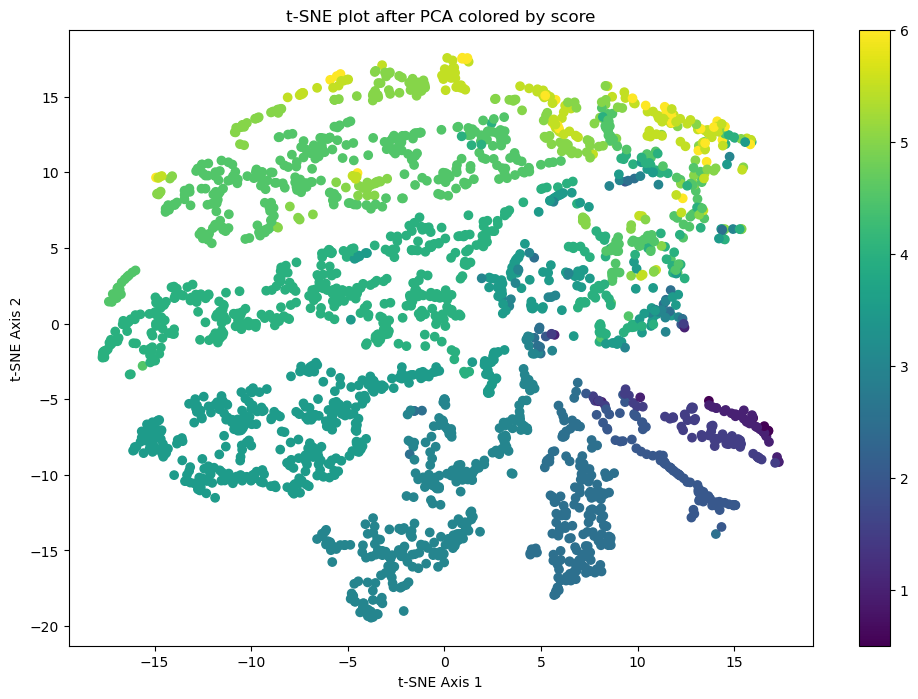

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming df is your initial dataframe
df  = data_aggregated

# Standardize the features
df_numeric = df.drop('id_', axis=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_result = pca.fit_transform(df_scaled)

# Now use t-SNE on the PCA-reduced data
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)

# Create a DataFrame that contains the t-SNE components and the score
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE Axis 1', 't-SNE Axis 2'])
tsne_df['score'] = df['score'].values  # Add the score column back in

# Plot the t-SNE result colored by score
plt.figure(figsize=(12,8))
scatter = plt.scatter(tsne_df['t-SNE Axis 1'], tsne_df['t-SNE Axis 2'], c=tsne_df['score'], cmap='viridis')

# Add a color bar
plt.colorbar(scatter)

plt.title('t-SNE plot after PCA colored by score')
plt.xlabel('t-SNE Axis 1')
plt.ylabel('t-SNE Axis 2')
plt.show()


In [6]:
data_aggregated.columns

Index(['id_', 'down_time_sum', 'up_time_sum', 'action_time_sum',
       'cursor_position_max', 'word_count_max', 'score'],
      dtype='object')